<a href="https://colab.research.google.com/github/chipojaya1/ML/blob/main/Practical_Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DNSC6314 Assignment 3 by Chipo Jaya: G44454879**
- Feature Information: Bike Data
- This project continues with Capital Bikeshare data from https://ride.capitalbikeshare.com/system-data

- Data is from three months: **2024/02, 2024/03 and 2024/04.**

## Capital Bikeshare Data
https://ride.capitalbikeshare.com/system-data

### Read data from drive or local

In [3]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
# Read csv files

df_Feb = pd.read_csv('/content/drive/MyDrive/Machine Learning I/202402-capitalbikeshare-tripdata.csv')
df_Mar = pd.read_csv('/content/drive/MyDrive/Machine Learning I/202403-capitalbikeshare-tripdata.csv')
df_Apr = pd.read_csv('/content/drive/MyDrive/Machine Learning I/202404-capitalbikeshare-tripdata.csv')

# concat data
df=pd.concat([df_Feb, df_Mar,df_Apr])

In [7]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,24DBACC298E33BF6,electric_bike,2024-02-01 21:18:50,2024-02-01 21:27:36,Eckington Pl & Q St NE,31505.0,5th & K St NW,31600.0,38.910893,-77.005023,38.90304,-77.019027,member
1,FE1067800A18BC56,electric_bike,2024-02-06 17:15:33,2024-02-06 17:30:33,4th & C St SW,31243.0,NaN,NaN,38.886443,-77.017388,38.91000,-76.980000,member
2,AD1962B215B5879D,electric_bike,2024-02-26 13:19:42,2024-02-26 13:30:44,North Capitol St & F St NW,31624.0,NaN,NaN,38.896907,-77.009684,38.90000,-77.010000,member
3,3F8352E6D9EC4F85,electric_bike,2024-02-02 11:01:22,2024-02-02 11:05:14,1st & K St NE,31662.0,NaN,NaN,38.902394,-77.005614,38.90000,-77.010000,member
4,D656DA87FA915F14,electric_bike,2024-02-25 08:28:18,2024-02-25 08:48:44,Virginia Ave & 25th St NW,31297.0,NaN,NaN,38.898456,-77.053075,38.91000,-77.060000,member


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245899 entries, 0 to 490264
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   ride_id             1245899 non-null  object 
 1   rideable_type       1245899 non-null  object 
 2   started_at          1245899 non-null  object 
 3   ended_at            1245899 non-null  object 
 4   start_station_name  1061748 non-null  object 
 5   start_station_id    1061748 non-null  float64
 6   end_station_name    1052421 non-null  object 
 7   end_station_id      1052253 non-null  float64
 8   start_lat           1245899 non-null  float64
 9   start_lng           1245899 non-null  float64
 10  end_lat             1244884 non-null  float64
 11  end_lng             1244884 non-null  float64
 12  member_casual       1245899 non-null  object 
dtypes: float64(6), object(7)
memory usage: 133.1+ MB


## Focus on GWSB Station: '22nd & H St NW'

### Bike Availability: Number of Pickups

In [9]:
# Convert the 'started_at' column to datetime objects
df['started_at_date'] = pd.to_datetime(df['started_at']).dt.date

# Filter for trips started at '22nd & H St NW'
PU_trips = df[df['start_station_name'] == '22nd & H St NW']

# Group by date and count the trips
PU_counts = PU_trips.groupby('started_at_date')['started_at_date'].count()

PU_counts

,started_at_date
started_at_date,
2024-02-01,33
2024-02-02,23
2024-02-03,22
2024-02-04,18
2024-02-05,19
...,...
2024-04-26,33
2024-04-27,18
2024-04-28,36


## Dock Availability: Number of Dropoffs

In [10]:
# Convert the 'ended_at' column to datetime objects
df['ended_at_date'] = pd.to_datetime(df['ended_at']).dt.date

# Filter for trips ended at '22nd & H St NW'
DO_trips = df[df['end_station_name'] == '22nd & H St NW']

# Group by date and count the trips
DO_counts = DO_trips.groupby('ended_at_date')['ended_at_date'].count()

DO_counts

,ended_at_date
ended_at_date,
2024-02-01,33
2024-02-02,25
2024-02-03,20
2024-02-04,19
2024-02-05,23
...,...
2024-04-26,39
2024-04-27,24
2024-04-28,28


## Merge PU and DO tables
- For each day, we look at the numbers of pickups and dropoffs

In [11]:
# merge PU_counts and DO_counts by matching the dates, and change the column names to PU_count and DO_count respectively.

PU_DO_counts = pd.merge(PU_counts, DO_counts, left_index=True, right_index=True, how='outer')
PU_DO_counts = PU_DO_counts.rename(columns={'started_at_date': 'PU_ct', 'ended_at_date': 'DO_ct'})

# change the index name from 'started_at' to 'date'

PU_DO_counts = PU_DO_counts.rename_axis('date')
PU_DO_counts


,PU_ct,DO_ct
date,,
2024-02-01,33,33
2024-02-02,23,25
2024-02-03,22,20
2024-02-04,18,19
2024-02-05,19,23
...,...,...
2024-04-26,33,39
2024-04-27,18,24
2024-04-28,36,28


## Visualize pickups and dropoffs

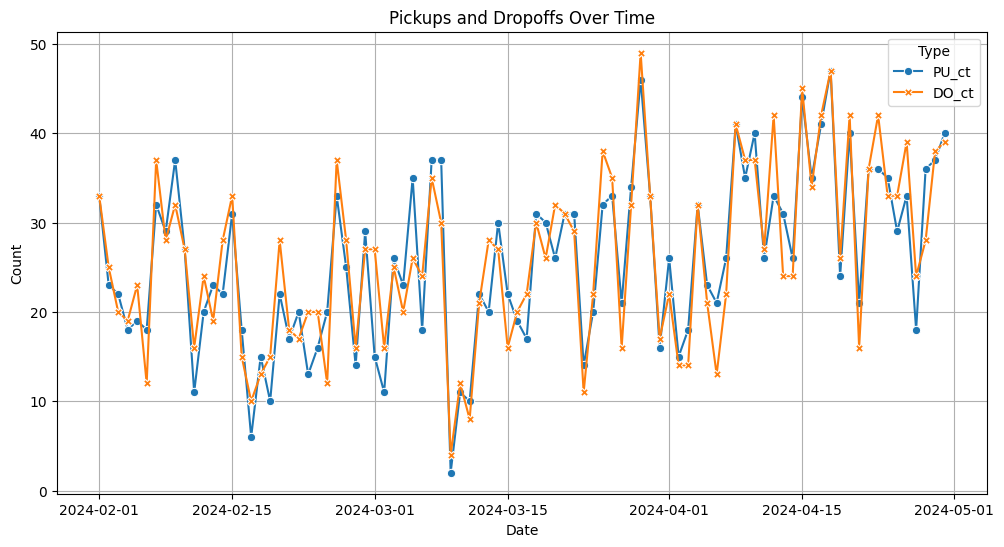

In [16]:
import seaborn as sns

# Convert PU_DO_counts to long format
PU_DO_long = pd.melt(PU_DO_counts.reset_index(), id_vars=['date'],
                     value_vars=['PU_ct', 'DO_ct'],
                     var_name='Type', value_name='Count')

# plotting pick up and drop off counts
plt.figure(figsize=(12, 6))
sns.lineplot(data=PU_DO_long, x='date', y='Count', hue='Type', style='Type',
             markers=True, dashes=False)

# customizing the chart
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Pickups and Dropoffs Over Time')
plt.legend(title='Type')
plt.grid(True)
plt.show()

# Feature Information: Weather Data
- From https://www.visualcrossing.com/weather-history/

In [17]:
df_weather = pd.read_csv('/content/drive/MyDrive/Machine Learning I/DC_weather_2024.csv')

df_weather.head()

,name,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,solarenergy,uvindex,severerisk,sunrise,sunset,moonphase,conditions,description,icon,stations
0,"washington, dc",2024-01-01,43.0,38.9,40.8,41.8,31.4,36.4,33.3,74.7,...,0.9,1,10,2024-01-01T07:26:50,2024-01-01T16:56:30,0.68,Overcast,Cloudy skies throughout the day.,cloudy,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
1,"washington, dc",2024-01-02,45.9,35.7,40.4,40.9,27.2,33.8,26.2,57.3,...,8.3,5,10,2024-01-02T07:26:58,2024-01-02T16:57:20,0.72,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"KDCA,72405013743,D6279,72403793728,KADW,KDAA,7..."
2,"washington, dc",2024-01-03,47.8,33.7,39.9,44.6,27.8,36.4,26.6,59.5,...,9.6,5,10,2024-01-03T07:27:04,2024-01-03T16:58:10,0.75,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,D6279,72403793728,KADW,..."
3,"washington, dc",2024-01-04,46.7,33.2,40.4,41.9,24.1,34.6,25.2,55.2,...,4.8,4,10,2024-01-04T07:27:07,2024-01-04T16:59:02,0.78,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,KADW,KDAA,7..."
4,"washington, dc",2024-01-05,39.9,27.8,33.6,35.8,19.4,28.0,18.9,55.0,...,11.6,5,10,2024-01-05T07:27:09,2024-01-05T16:59:55,0.81,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"C6294,KDCA,72405013743,72403793728,D6279,KADW,..."


In [18]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 33 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              366 non-null    object 
 1   datetime          366 non-null    object 
 2   tempmax           366 non-null    float64
 3   tempmin           366 non-null    float64
 4   temp              366 non-null    float64
 5   feelslikemax      366 non-null    float64
 6   feelslikemin      366 non-null    float64
 7   feelslike         366 non-null    float64
 8   dew               366 non-null    float64
 9   humidity          366 non-null    float64
 10  precip            366 non-null    float64
 11  precipprob        366 non-null    int64  
 12  precipcover       366 non-null    float64
 13  preciptype        134 non-null    object 
 14  snow              366 non-null    float64
 15  snowdepth         366 non-null    float64
 16  windgust          366 non-null    float64
 1

## Drop variables of your choice

In [19]:
# Drop unnecessary variables
df_weather=df_weather.drop(columns=['name', 'stations','description','sunrise','sunset','conditions','severerisk','preciptype','windgust'])

## Prepare X and y: Merge df_weather with PU_DO_counts

In [20]:
# Convert the 'datetime' column to datetime objects and extract the date
df_weather['datetime'] = pd.to_datetime(df_weather['datetime'])
df_weather['date'] = df_weather['datetime'].dt.date

# Merge the two dataframes based on the 'date' column
merged_df = pd.merge(PU_DO_counts, df_weather, on='date', how='left')

# Display the merged dataframe
merged_df

,date,PU_ct,DO_ct,datetime,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,...,windspeed,winddir,sealevelpressure,cloudcover,visibility,solarradiation,solarenergy,uvindex,moonphase,icon
0,2024-02-01,33,33,2024-02-01,53.0,31.7,42.4,53.0,26.4,39.3,...,12.0,190.8,1016.3,43.3,8.4,136.8,11.8,5,0.73,partly-cloudy-day
1,2024-02-02,23,25,2024-02-02,51.8,44.0,47.1,51.8,36.6,44.4,...,19.1,354.3,1012.8,97.3,9.8,51.7,4.4,2,0.75,rain
2,2024-02-03,22,20,2024-02-03,51.0,35.8,42.2,51.0,28.0,37.6,...,14.7,354.9,1018.2,11.0,9.9,143.9,12.5,6,0.79,clear-day
3,2024-02-04,18,19,2024-02-04,51.2,32.7,41.7,51.2,27.4,40.7,...,9.2,87.4,1016.0,9.0,9.9,147.4,12.8,6,0.83,clear-day
4,2024-02-05,19,23,2024-02-05,51.8,32.5,41.0,51.8,26.0,37.8,...,12.2,34.9,1013.8,21.4,9.9,145.3,12.7,6,0.86,partly-cloudy-day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,2024-04-26,33,39,2024-04-26,64.9,45.5,55.2,64.9,41.5,54.2,...,15.4,116.4,1029.5,69.1,9.9,215.0,18.5,9,0.59,partly-cloudy-day
86,2024-04-27,18,24,2024-04-27,60.1,51.9,55.7,60.1,51.9,55.7,...,10.0,149.9,1030.1,97.3,9.7,44.0,3.9,2,0.63,rain
87,2024-04-28,36,28,2024-04-28,83.1,55.8,67.0,83.3,55.8,67.1,...,10.0,170.0,1021.3,62.1,9.8,213.6,18.5,9,0.67,partly-cloudy-day
88,2024-04-29,37,38,2024-04-29,88.3,62.7,75.2,88.9,62.7,75.3,...,13.0,177.3,1015.6,35.8,9.9,204.5,17.8,9,0.70,partly-cloudy-day


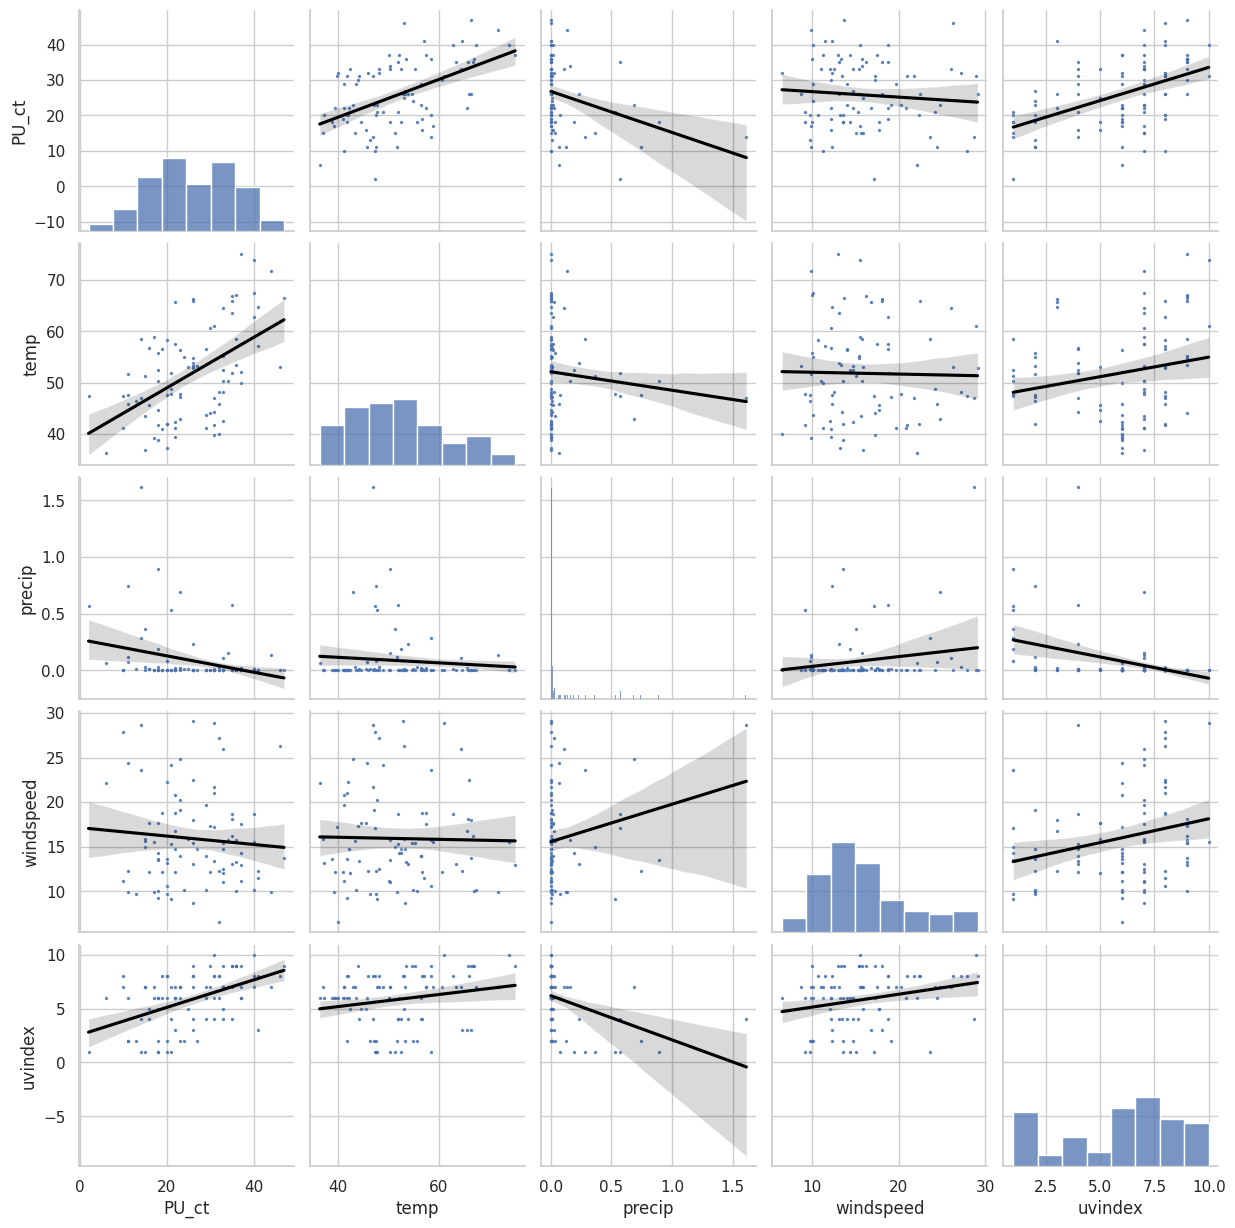

In [21]:
sns.set(style='whitegrid')     # Set visual style for seaborn

sns.pairplot(merged_df[['PU_ct',"temp", "precip", "windspeed","uvindex"]], kind="reg",plot_kws=dict(scatter_kws=dict(s=2), line_kws = {'color':'black'})) # pairplot for PU_ct

# Prepare training and test data

In [22]:
# we have two target variables: PU_ct and DO_ct
y = merged_df[['PU_ct','DO_ct']]
X = merged_df[['temp','precip','windspeed','uvindex','icon']]
X

,temp,precip,windspeed,uvindex,icon
0,42.4,0.000,12.0,5,partly-cloudy-day
1,47.1,0.012,19.1,2,rain
2,42.2,0.000,14.7,6,clear-day
3,41.7,0.000,9.2,6,clear-day
4,41.0,0.000,12.2,6,partly-cloudy-day
...,...,...,...,...,...
85,55.2,0.000,15.4,9,partly-cloudy-day
86,55.7,0.032,10.0,2,rain
87,67.0,0.000,10.0,9,partly-cloudy-day
88,75.2,0.000,13.0,9,partly-cloudy-day


## <font color="red"> Important: train_test_split with y=['PU_ct','DO_ct']. Why? <font>

In [23]:
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X,y, test_size=0.4, random_state = 200) # 40% test data

# **Assignment 3: Regularization and Cross Validation**

In [24]:
# load packages
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn import model_selection
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error

### Encode dummy variables for categorical features. In this assignment, we use all features in `X_train_dummies` and `X_test_dummies`.



In [25]:
# get dummies in X_train_PU
X_train_dummies = pd.get_dummies(X_train, columns=['icon'], prefix='icon',drop_first=True)

# get dummies in X_test_PU
X_test_dummies = pd.get_dummies(X_test, columns=['icon'], prefix='icon',drop_first=True)

# Ensure both training and testing sets have the same columns
X_test_dummies = X_test_dummies.reindex(columns=X_train_dummies.columns, fill_value=0)

## Task 1: Following Lec 4 example 'Logistic Regression and SVM.ipynb', apply feature standardization for `X_train_dummies` and `X_test_dummies`. [10 pts]

In [40]:
# Feature Standardization
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform Training data
X_train = pd.DataFrame(scaler.fit_transform(X_train_dummies), index=X_train_dummies.index, columns=X_train_dummies.columns)

# Transform testing data
X_test = pd.DataFrame(scaler.transform(X_test_dummies), index=X_test_dummies.index, columns=X_test_dummies.columns)

## Task 2: Following Lec 5 example 'Model Evaluation.ipynb', evaluate the performance of `Lasso(alpha=1)` for 'PU_ct' prediction. Specifically, use 5-Fold cross validation and report the average scoring metric `neg_mean_squared_error` . [10 pts]

Score in each fold: [-60.58707245 -64.44760963 -63.01496729 -49.71073978 -94.9516093 ]
Average score with a standard deviation of: -66.54239968736606 15.117439023736747


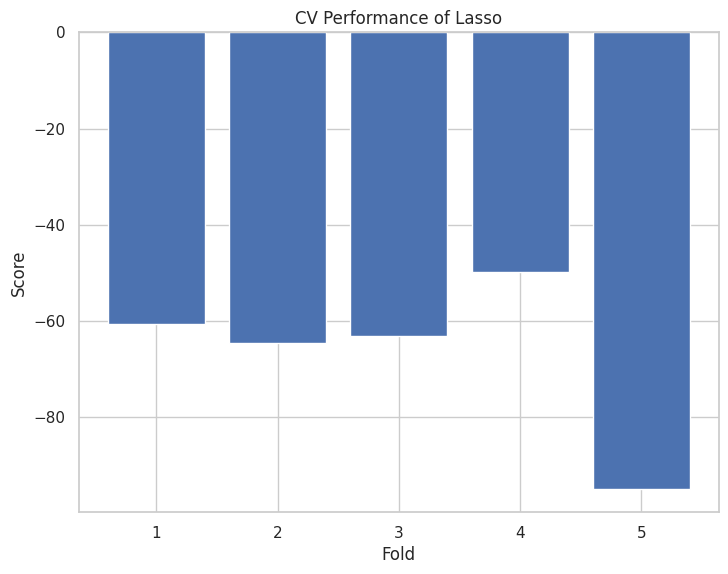

In [57]:
# Initialize the model
lasso = Lasso(alpha=1)

# K-Fold cross validation
K=5
scores = cross_val_score(lasso, X_train, y_train['PU_ct'], cv=K, scoring='neg_mean_squared_error')

# Reporting the average scoring metric neg_mean_squared_error
print("Score in each fold:", scores)
print("Average score with a standard deviation of:", scores.mean(), scores.std())

# Plotting the performance
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(np.arange(1,K+1),scores)
plt.xlabel("Fold")
plt.ylabel("Score")
plt.title('CV Performance of Lasso')
plt.show()


## Task 3: Following Lec 6 example 'Regularization.ipynb', plot 'Lasso coefficients as a function of the regularization' for Lasso model with `alphas = np.logspace(-4, 2, 50)` for 'PU_ct' prediction. [10 pts]

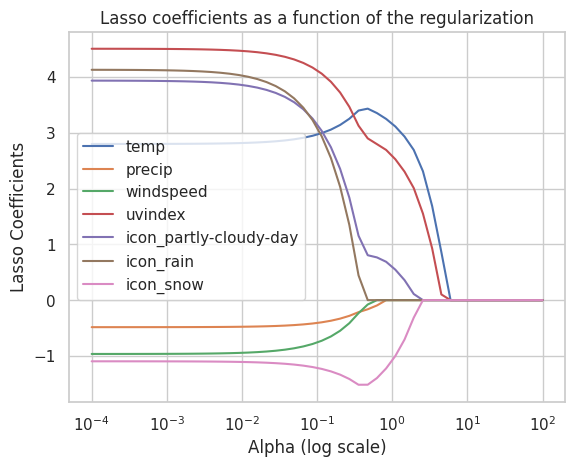

In [49]:
# Automatic formation of feature selection
alphas = np.logspace(-4, 2, 50)

lasso = Lasso()
coefs = []

for a in alphas:
    lasso.set_params(alpha=a, max_iter=10000) # increasing iterations for optimization of coefficients
    lasso.fit(scale(X_train), y_train['PU_ct'])
    coefs.append(lasso.coef_)

# Plotting the coefficients
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim())
plt.axis('tight')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Lasso Coefficients')
plt.legend(list(X_train.columns), loc='best')
plt.title('Lasso coefficients as a function of the regularization');

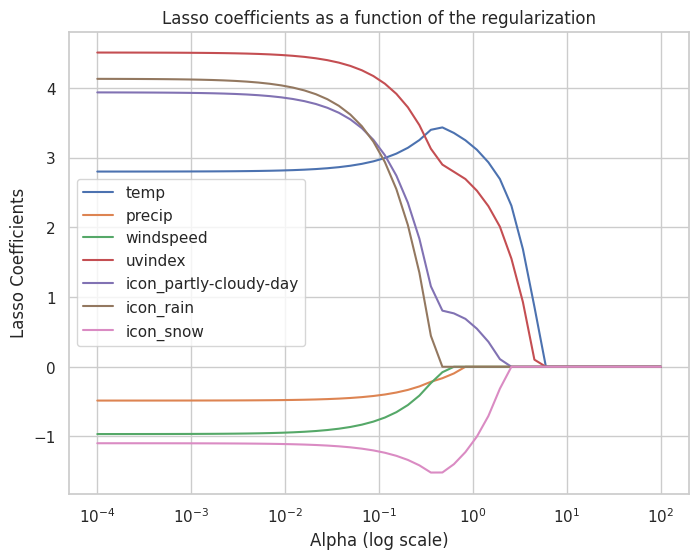

In [55]:
# Defining the Lasso model with alphas = np.logspace(-4, 2, 50) for 'PU_ct' prediction
lasso_ = [Lasso(alpha=alphas) for alphas in np.logspace(-4, 2, 50)]

coefs = []

for model in lasso_:
    model.fit(X_train, y_train['PU_ct'])
    coefs.append(model.coef_)

# Plotting the coefficients
plt.figure(figsize=(8, 6))
plt.plot(np.logspace(-4, 2, 50), coefs)
plt.xscale('log')
plt.xlabel('Alpha (log scale)')
plt.ylabel('Lasso Coefficients')
plt.title('Lasso coefficients as a function of the regularization')
plt.legend(list(X_train.columns), loc='best')
plt.grid(True)
plt.show()


## Task 4: Following Lec 5 example 'Model Evaluation.ipynb', use `GridSearchCV` to find the best alpha within `alphas = np.logspace(-4, 2, 50)` for Lasso model for 'PU_ct' prediction. [10 pts]

In [ ]:
# Finding best alpha with GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# initialising the model
model = Lasso()

# fitting the model
param_grid = {'alpha': np.logspace(-4, 2, 50)}
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_standardised, y_train['PU_ct'])

# finding the best alpha
best_alpha_grid = grid_search.best_params_['alpha']
print("Best alpha:", best_alpha_grid)

## Task 5: Following Lec 6 example 'Regularization.ipynb', use `LassoCV` to find the best alpha within `alphas = np.logspace(-4, 2, 50)` for Lasso model for 'PU_ct' prediction. [10 pts]

In [ ]:
# Finding best alpha with LassoCV

# Defining the LassoCV model with alphas = np.logspace(-4, 2, 50) for 'PU_ct' prediction
# initialising the model
lasso = LassoCV(alphas=np.logspace(-4, 2, 50), cv=5, random_state=0)

# fitting the model
lasso.fit(X_train_standardised, y_train['PU_ct'])

# finding the best alpha
print("LassoCV: Best hyperparameter alpha:", lasso.alpha_)
print("LassoCV: Best score: ", lasso.score(X_train_standardised, y_train['PU_ct']))
print("Validation set performance: ", predict(lasso, X_valid_standardised, y_valid['PU_ct']))
print("Training set performance: ", predict(lasso, X_train_standardised, y_train['PU_ct']))

## Task 6: Print the coefficients from the Lasso model for 'PU_ct' prediction with the best alpha identified in Task 5. [10 pts]

In [ ]:
# Printing the coefficients from the Lasso model for 'PU_ct' prediction with the best alpha
lasso_model = Lasso(alpha=lasso.alpha_)

lasso_model.fit(X_train_standardised, y_train['PU_ct'])
coefficients = lasso_model.coef_

# Summary table of lasso model coefficients with best alpha
# Create a DataFrame to display the coefficients
summary_table = pd.DataFrame({'Feature': X_train_dummies.columns, 'Coefficient': coefficients})
print(summary_table)


## Task 7: Evaluate the out-of-sample MSE of the Lasso model for 'PU_ct' prediction with the best alpha identified in Task 5. [10 pts]

In [ ]:
# Out of sample MSE of the Lasso model with best alpha
y_pred = lasso_model.predict(X_test_standardised)
mse = mean_squared_error(y_test['PU_ct'], y_pred)
print("Out-of-sample MSE for PU_ct:", mse)

## Task 8: Following Lec 6 example 'Regularization.ipynb', use `LassoCV` to find the best alpha within `alphas = np.logspace(-4, 2, 50)` for Lasso model for 'DO_ct' prediction. [10 pts]

In [ ]:
# Finding best aplha with LassoCv for the DO_ct variable

# initialise the model
model = LassoCV(alphas=np.logspace(-4, 2, 50), cv=5, random_state=0)

# fit the model
model.fit(X_train_standardised, y_train['DO_ct'])

# find the best alpha
best_alpha_lassocv = model.alpha_
print("Best alpha:", best_alpha_lassocv)

# print coefficients in a summary table
lasso_model = Lasso(alpha=best_alpha_lassocv)
lasso_model.fit(X_train_standardised, y_train['DO_ct'])
coefficients = lasso_model.coef_

summary_table2 = pd.DataFrame({'Feature': X_train_dummies.columns, 'Coefficient': coefficients})
print(summary_table2)

## Task 9: Evaluate the out-of-sample MSE of the Lasso model for 'DO_ct' prediction with the best alpha identified in Task 8. [10 pts]

In [ ]:
# out of sample mse for DO_ct model
y_pred = lasso_model.predict(X_test_standardised)
mse = mean_squared_error(y_test['DO_ct'], y_pred)
print("Out-of-sample MSE for DO_ct:", mse)


## <font color="red"> Note: acknowledgement of GenAI used <font>
Google Colab AI was consulted during the research process.